# Q1 - Traditional non neural network approach

- Pick an approach (such as Linear Regression) - classification method
- Why pick this approach? - 
- How well does this traditional approach work? - 

Aim at 'beginner ML audience'
Provide tutorial of method
Explain choices made

**Before working through this notebook, ensure you have read through the [README.md](https://github.com/GHancock1/Coursework-2/blob/main/README.md) and installed the necessary Python dependencies.**

In [ ]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("..")

from functions import *

# Importing the Kepler Exoplanet Search Results dataset from GitHub.
df = getData()

To begin exploring how often an object confirmed to be an exoplanet in the literature is deconfirmed by Kepler data analysis, we should look at the data as-is in the dataset. To do so, we will look at the first few rows then use seaborn's pairplot function.

In [48]:
df.head()

rowid     kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2      3  10811496  K00753.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE   FALSE POSITIVE   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  ...  koi_insol  \
0      1.000              0              0              0  ...      93.59   
1      0.969              0              0              0  ...       9.11   
2      0.000              0              1              0  ...      39.30   
3      0.000              0              1              0  ...     891.96   
4      1.000              0              0              0  ...     926.16   

   koi_model_snr  koi_tce_plnt_num  koi_tce_delivname  koi_steff  koi_slogg  \
0           35.8               1.0    q1_q17_dr25_tce     5455.0      4.467   
1           25.8               2.0    q1_q17_dr25_tce     5455.0      4.467   
2           76.3               1.0    q1_q17_dr25_tce     5853.0      4.544   
3          505.6               1.0    q1_q17_dr25_tce     5805.0      4.564   
4           40.9               1.0    q1_q17_dr25_tce     6031.0      4.438   

   koi_srad         ra        dec  koi_kepmag  
0     0.927  291.93423  48.141651      15.347  
1     0.927  291.93423  48.141651      15.347  
2     0.868  297.00482  48.134129      15.436  
3     0.791  285.53461  48.285210      15.597  
4     1.046  288.75488  48.226200      15.509  

[5 rows x 28 columns]

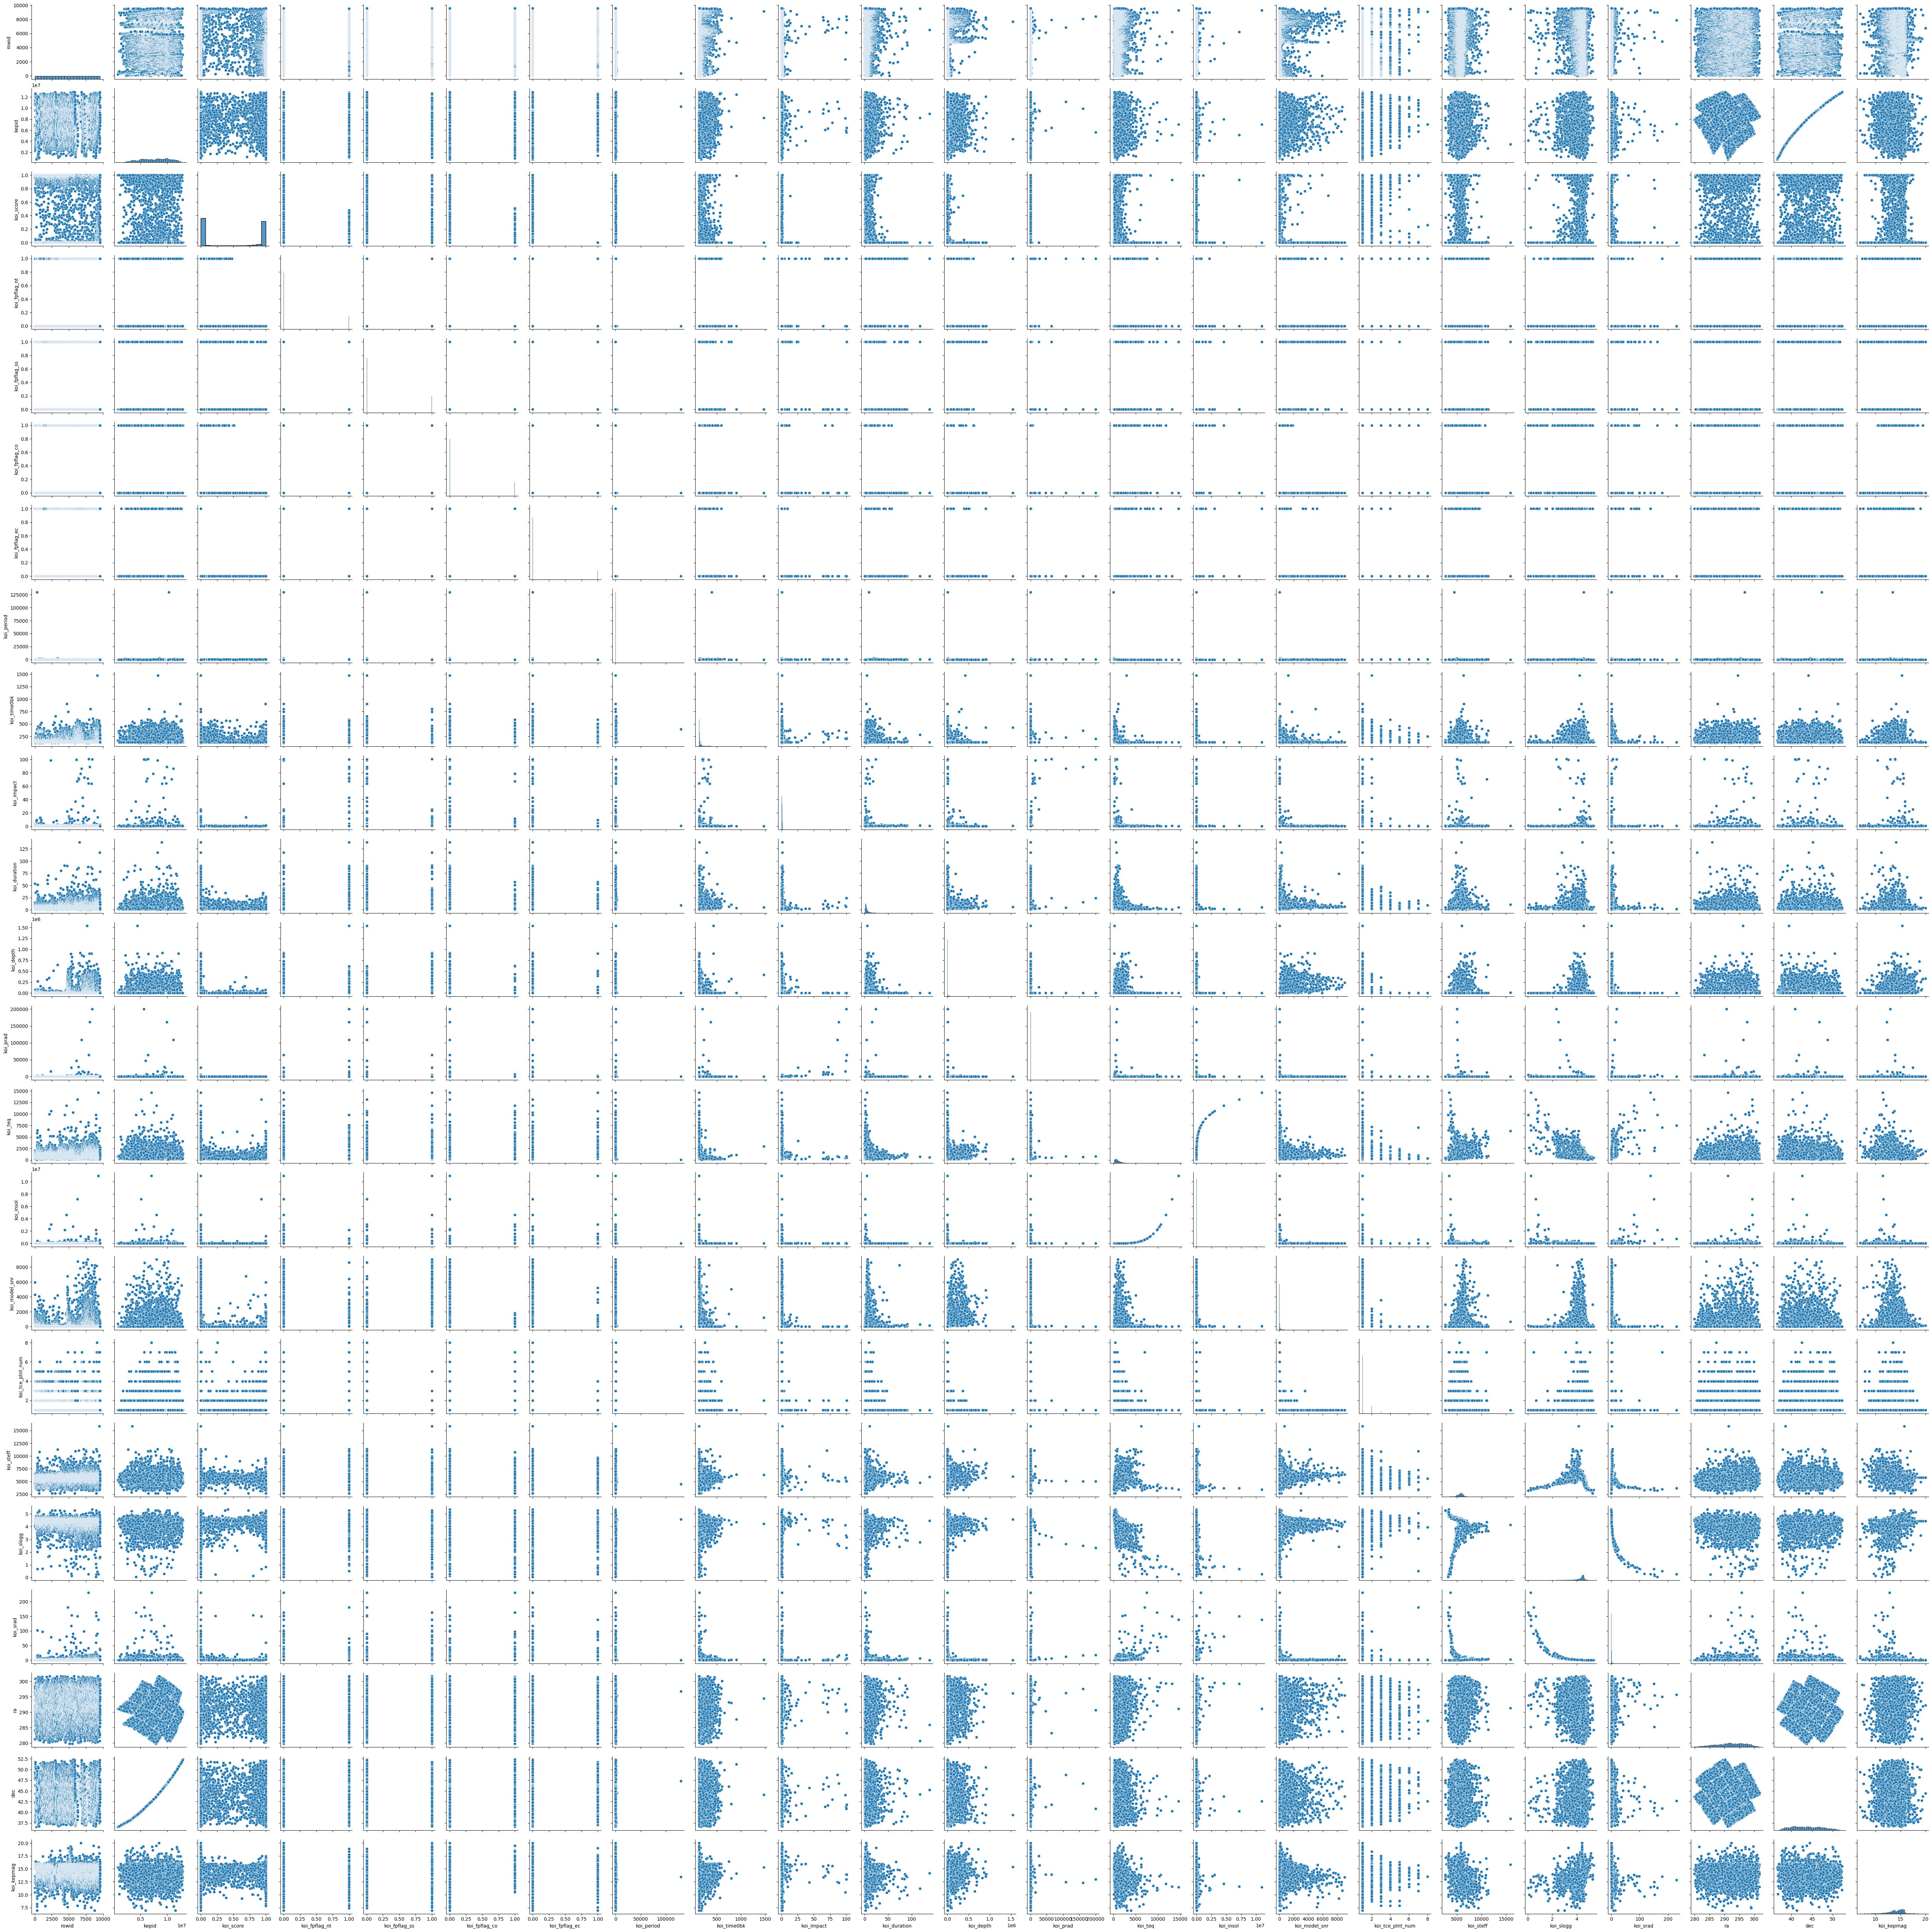

In [49]:
# This will take a while to run, no need to actually run it.
sns.pairplot(df)

As you can see from the graphs above, there are a lot of features (columns) to this dataset. As a result, there are over 500 combinations of features, so the dataset must be trimmed to only contain data we are interested in.  
  
The dataset must be trimmed to remove unnecessary columns. We want to look at stellar parameters and candidacy score, so we should only keep relevant columns, and the object's name or ID number. We will also drop the errors for measurements when given. Such information is useful when performing more in depth analysis, but for now the rough measurements will be enough to look for any patterns. 

In [52]:
df_trimmed = df.filter(items=["rowid", "koi_score", "koi_steff","koi_slogg", "koi_smet", "koi_srad", "koi_smass", "koi_sage"])
df_trimmed.head()

rowid  koi_score  koi_steff  koi_slogg  koi_srad
0      1      1.000     5455.0      4.467     0.927
1      2      0.969     5455.0      4.467     0.927
2      3      0.000     5853.0      4.544     0.868
3      4      0.000     5805.0      4.564     0.791
4      5      1.000     6031.0      4.438     1.046

Now that we have a more reasonably sized dataset, we can use pairplot again to

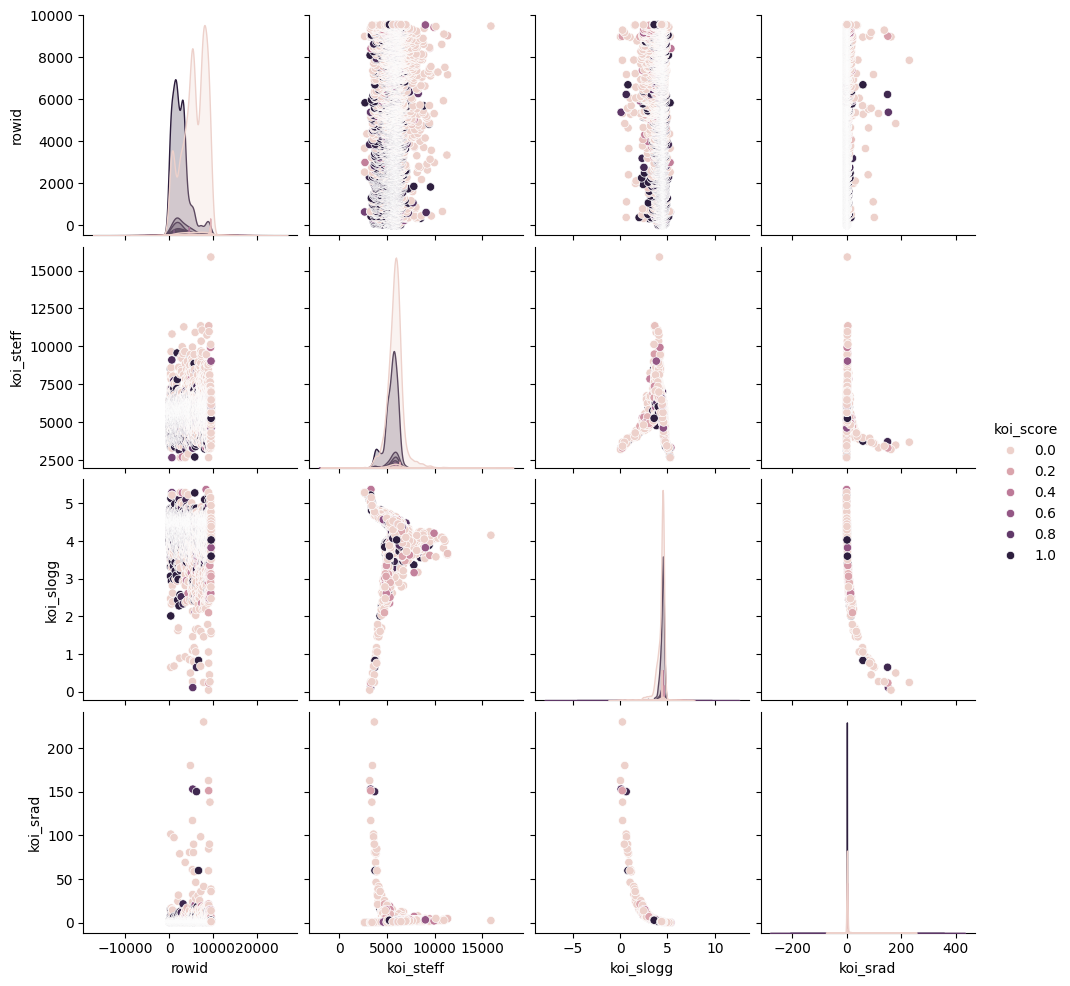

In [51]:
sns.pairplot(df_trimmed, hue="koi_score")